In [1]:
import sys
sys.path.append('../pygtool3/')
import pygtool
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
import matplotlib.colors as colors
import matplotlib.ticker as mticker

In [2]:
plt.rcParams['font.size']=12

# setup coordinate

In [3]:
# horizontal coordinate
grid=pygtool.readgrid()
xx,yy=grid.getmesh()
area=grid.getarea()

In [4]:
# vertical coordinate
sigma=pygtool.readsigma()
sigma_M=pygtool.readsigma(z=37,gtaxfile='GTAXLOC.HETA36.M')

# read model data

In [5]:
bc=pygtool.read3d('./sampledata/mc_bc.clim',count=4)
ps=pygtool.read2d('./sampledata/ps.clim',count=4)
t=pygtool.read3d('./sampledata/T.clim',count=4)
z=pygtool.read3d('./sampledata/z.clim',count=4)

# とりあえず全球プロット
## contour

Text(0.5, 0.98, 'BC mass')

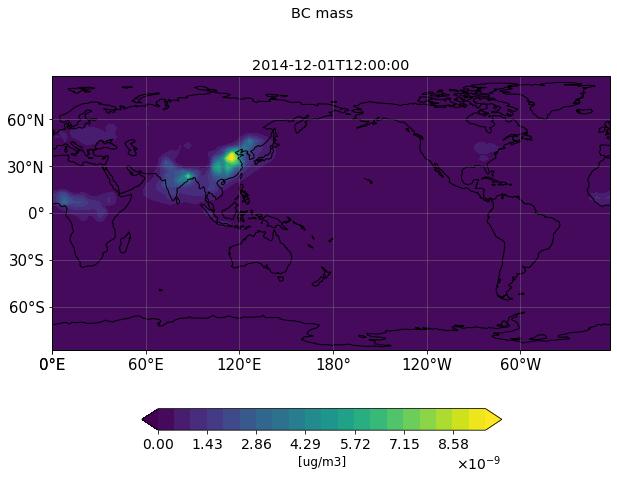

In [6]:
# plt.rcParams['font.size']=15
fig,ax,cbar=pygtool.gtplot.contourf(xx,yy,bc.getarr()[0,:,:])
cbar.set_label('[ug/m3]')
ax.set_title(bc.getdate())
fig.suptitle('BC mass')

## logcontour

Text(0.5, 0.98, 'BC mass')

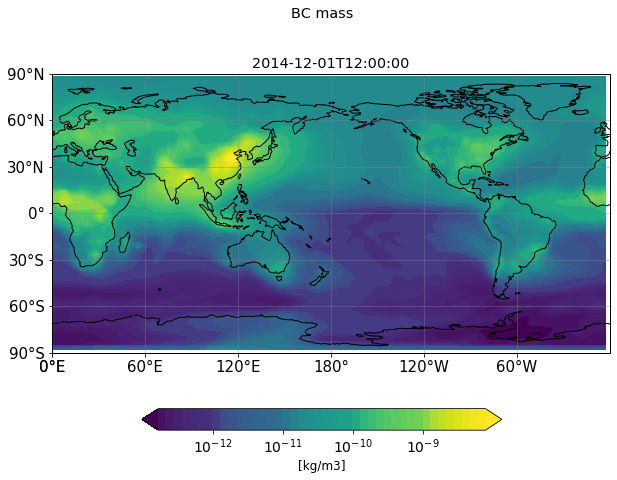

In [7]:
fig,ax,cbar=pygtool.gtplot.logcontourf(xx,yy,bc.getarr()[0,:,:],subs='all')
cbar.set_label('[kg/m3]')
ax.set_title(bc.getdate())
ax.set_global()
fig.suptitle('BC mass')

# column BC

In [8]:
xx,yy=grid.getmesh()
columnBC=pygtool.gtcalic.getcmass_column(cmass=bc,sigma=sigma,sigma_M=sigma_M,T=t,ps=ps,fact=1e6)

(<Figure size 720x432 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x2b535079a898>)

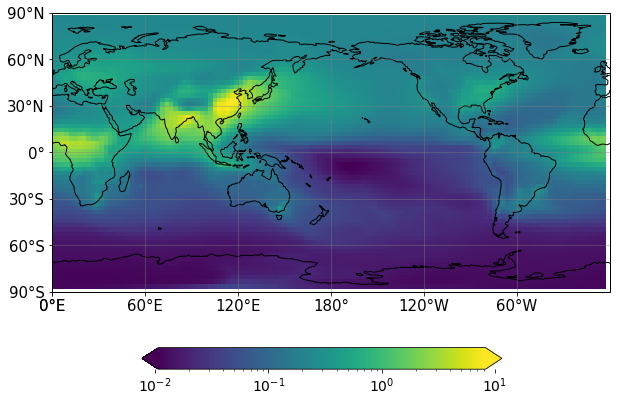

In [9]:
pygtool.gtplot.pcolormesh(xx,yy,columnBC,scale='log')

(<Figure size 720x432 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x28baa81f2b0>)

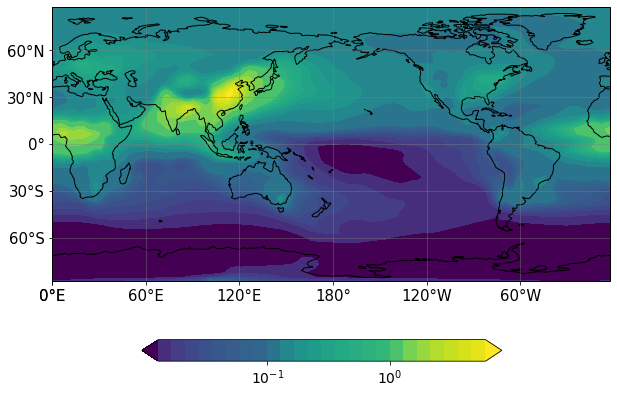

In [22]:
xx,yy=grid.getmesh()
pygtool.gtplot.logcontourf(xx,yy,columnBC,subs='all',vmin=1e-2,vmax=1e1)

Text(0.5, 0.98, 'BC mass')

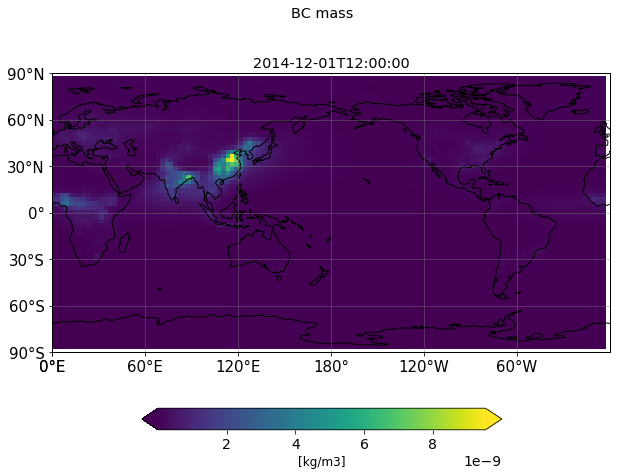

In [38]:
fig,ax,cbar=pygtool.gtplot.pcolormesh(xx,yy,bc)
cbar.set_label('[kg/m3]')
ax.set_title(bc.getdate())
fig.suptitle('BC mass')

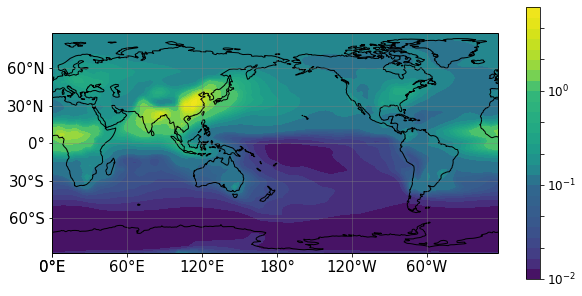

In [32]:
xx,yy=grid.getmesh()
fig=plt.figure(figsize=(10,5),facecolor='w')
ax=fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=180))
pygtool.ckit.set_geogrid(ax)
cf=ax.contourf(xx,yy,columnBC,norm=colors.LogNorm(vmin=1e-2,vmax=1e1),transform=ccrs.PlateCarree(),
          locator=mticker.LogLocator(subs='all') )
fig.colorbar(cf,
            format=mticker.LogFormatterSciNotation())
# cf=ax.pcolormesh(xx,yy,columnBC,transform=ccrs.PlateCarree(),norm=colors.LogNorm())
# fig.colorbar(cf,orientation='horizontal',shrink=0.6,extend='both')

# zonal mean

Text(0.5, 1.0, '2014-12-01T12:00:00')

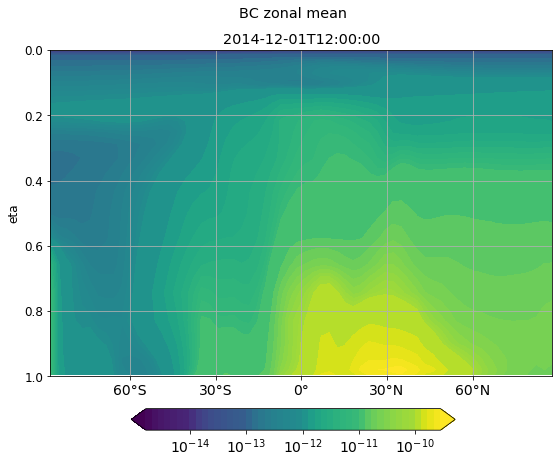

In [10]:
lon,lat=grid.getlonlat()
yy,zz=np.meshgrid(lat,sigma.ss)
fig,ax,cbar=pygtool.gtplot.zonal_logcontourf(yy,zz,bc,dlat=30)
fig.suptitle('BC zonal mean')
ax.set_title(bc.getdate())

Text(0.5, 1.0, '2014-12-01T12:00:00')

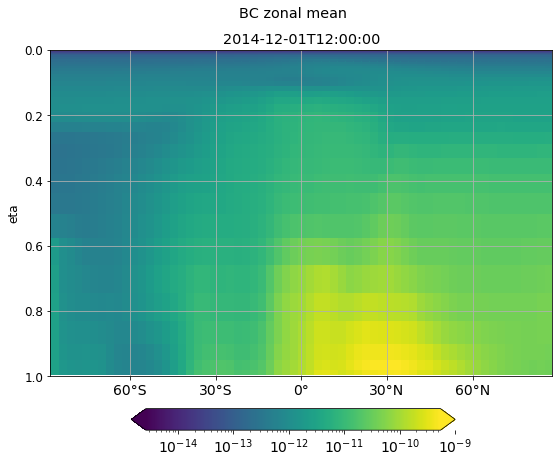

In [12]:
fig,ax,cbar=pygtool.gtplot.zonal_pcolormesh(yy,zz,bc,dlat=30,scale='log')
fig.suptitle('BC zonal mean')
ax.set_title(bc.getdate())

In [13]:
P=sigma.get_pressure(ps)

(<Figure size 648x432 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x2b5350d72860>)

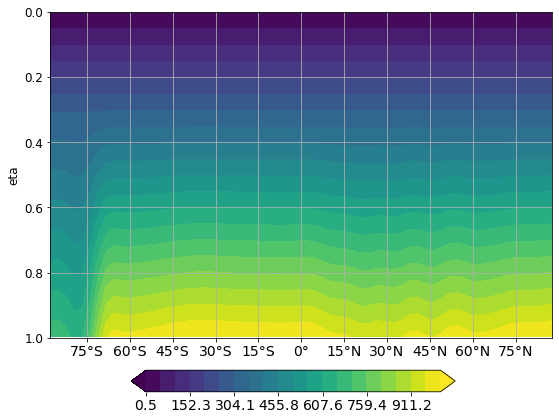

In [14]:
pygtool.gtplot.zonal_contourf(yy,zz,P,xsel=1)